# Filter dan Jendela Filter

## Filter

Filter dalam konteks pemrosesan sinyal digital adalah sebuah algoritma atau perangkat lunak yang digunakan untuk memanipulasi sinyal input dengan cara tertentu. Tujuannya bisa bervariasi, mulai dari menghilangkan noise yang tidak diinginkan, menyoroti atau menekankan komponen frekuensi tertentu dari sinyal, hingga mengubah karakteristik sinyal secara keseluruhan. Filter dapat beroperasi dalam domain waktu atau frekuensi, tergantung pada jenis filter yang digunakan. Filter waktu bekerja langsung pada domain waktu sinyal, sementara filter frekuensi beroperasi pada domain frekuensi. Jenis-jenis filter waktu meliputi filter rata-rata, filter Gaussian, dan filter deret Fourier, sedangkan filter frekuensi mencakup filter low-pass, high-pass, band-pass, dan band-stop. Filter ini dapat diimplementasikan dalam berbagai bentuk, mulai dari filter FIR (Finite Impulse Response) yang memiliki respon impuls terbatas hingga filter IIR (Infinite Impulse Response) yang memiliki respon impuls tak terbatas. Penggunaan filter sangat luas dalam berbagai aplikasi pemrosesan sinyal, termasuk dalam komunikasi digital, pemrosesan audio, pengolahan gambar, dan banyak lagi. Dengan filter, kita dapat mengoptimalkan sinyal untuk memenuhi kebutuhan spesifik dalam berbagai aplikasi, sehingga memungkinkan kita untuk mendapatkan informasi yang lebih bermakna dari data yang diterima.

Filter dapat dibagi menjadi dua jenis utama: filter waktu (time-domain) dan filter frekuensi (frequency-domain).a. 
Filter Waktu: Filter yang beroperasi langsung pada domain waktu sinyal. Misalnya, filter rata-rata (moving average), filter Gaussian, atau filter deret Fourier.b. 
Filter Frekuensi: Filter yang beroperasi pada domain frekuensi sinyal. Contohnya termasuk filter low-pass, high-pass, band-pass, dan band-stop. Filter ini bekerja dengan cara memanipulasi komponen frekuensi dari sinyal.

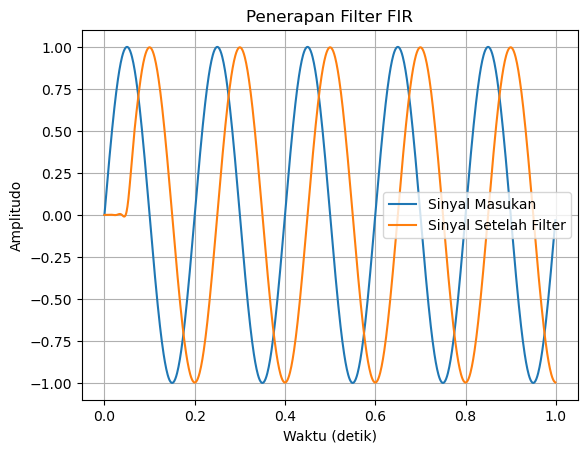

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter

# Generate input signal (sinyal masukan)
fs = 1000  # frekuensi sampling (Hz)
t = np.arange(0, 1, 1/fs)  # waktu dari 0 hingga 1 detik
x = np.sin(2 * np.pi * 5 * t)  # sinyal sinusoidal dengan frekuensi 5 Hz

# Desain filter FIR (Low-pass filter dengan cutoff frequency 50 Hz)
cutoff_freq = 50  # frekuensi cutoff filter (Hz)
num_taps = 101  # jumlah titik/taps filter
fir_coefficients = firwin(num_taps, cutoff_freq, fs=fs)

# Terapkan filter ke sinyal masukan
filtered_signal = lfilter(fir_coefficients, 1.0, x)

# Plot sinyal masukan dan keluaran filter
plt.figure()
plt.plot(t, x, label='Sinyal Masukan')
plt.plot(t, filtered_signal, label='Sinyal Setelah Filter')
plt.xlabel('Waktu (detik)')
plt.ylabel('Amplitudo')
plt.title('Penerapan Filter FIR')
plt.legend()
plt.grid(True)
plt.show()

Dalam contoh ini, kita pertama-tama menghasilkan sinyal masukan x, yang merupakan sinyal sinusoidal dengan frekuensi 5 Hz. Kemudian, kita mendesain filter FIR dengan menggunakan fungsi firwin dari pustaka SciPy, di mana kita memilih filter low-pass dengan frekuensi cutoff 50 Hz dan jumlah taps filter sebanyak 101. Setelah mendapatkan koefisien filter FIR, kita menerapkannya ke sinyal masukan menggunakan fungsi lfilter. Akhirnya, kita memplot sinyal masukan dan keluaran filter untuk melihat efek filter pada sinyal.

## Jendela

Jendela (window) adalah fungsi matematis yang digunakan untuk membatasi atau memberi bobot pada bagian tertentu dari sinyal dalam interval waktu tertentu. Penggunaan jendela sangat umum dalam teknik analisis spektral seperti Transformasi Fourier, di mana sinyal sering dibagi menjadi segmen-segmen kecil sebelum diubah ke domain frekuensi. Jenis-jenis jendela yang umum digunakan meliputi jendela persegi (rectangular window), jendela Hamming, jendela Hanning, dan masih banyak lagi. Setiap jenis jendela memiliki karakteristik unik dalam hal bentuk dan respons frekuensi. Misalnya, jendela persegi memberikan bobot konstan pada seluruh sinyal, sementara jendela Hamming dan Hanning memberikan bobot yang lebih rendah di tepi jendela untuk mengurangi efek artifak pada hasil transformasi. Penggunaan jendela ini membantu dalam mengurangi efek leakage dan artefak pada hasil analisis frekuensi, serta meningkatkan resolusi frekuensi. Selain itu, jendela juga digunakan dalam berbagai teknik pemrosesan sinyal lainnya seperti Short-Time Fourier Transform (STFT) dan Discrete Fourier Transform (DFT). Dengan memilih jendela yang sesuai, kita dapat memperoleh representasi frekuensi yang lebih akurat dari sinyal input, yang pada gilirannya membantu dalam pemahaman dan interpretasi sinyal tersebut.

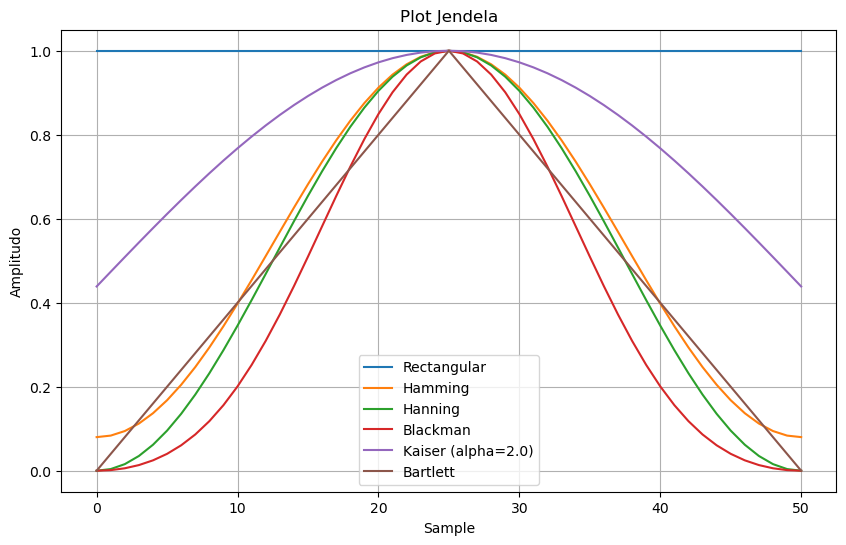

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter jendela
window_length = 51  # Panjang jendela
alpha = 2.0  # Parameter jendela Kaiser

# Jendela-jendela yang akan diuji
windows = {
    'Rectangular': np.ones(window_length),
    'Hamming': np.hamming(window_length),
    'Hanning': np.hanning(window_length),
    'Blackman': np.blackman(window_length),
    'Kaiser (alpha=2.0)': np.kaiser(window_length, alpha),
    'Bartlett': np.bartlett(window_length)  # Menambahkan jendela Bartlett
}

# Plot jendela-jendela
plt.figure(figsize=(10, 6))
for window_name, window in windows.items():
    plt.plot(window, label=window_name)

plt.title('Plot Jendela')
plt.xlabel('Sample')
plt.ylabel('Amplitudo')
plt.legend()
plt.grid(True)
plt.show()

Dalam contoh ini, kami menggunakan pustaka NumPy untuk menghasilkan beberapa jenis jendela yang umum digunakan, termasuk jendela persegi (Rectangular), Hamming, Hanning, Blackman, dan Kaiser. Kami mengatur panjang jendela dan parameter alpha untuk jendela Kaiser. Kemudian, kami memplot jendela-jendela ini menggunakan matplotlib untuk melihat bentuk dan karakteristik masing-masing jendela.

### Jendela Hann

Jendela Hann, atau sering disebut juga sebagai Hanning window, adalah salah satu jenis jendela yang umum digunakan dalam pemrosesan sinyal. Jendela ini dikenal karena bentuknya yang berupa kurva cosinus yang terangkat. Dalam prakteknya, jendela ini digunakan untuk meminimalkan efek leakage yang terjadi saat melakukan Transformasi Fourier pada sinyal. Efek leakage ini terjadi ketika sinyal yang diolah memiliki batasan waktu, sehingga frekuensi sinyal yang sebenarnya mungkin tersebar di sepanjang spektrum frekuensi yang dihasilkan oleh transformasi tersebut. Dengan menerapkan jendela Hann, amplitudo sinyal pada ujung-ujung periode sinyal akan diperkecil, sehingga mengurangi kontribusi dari frekuensi-frekuensi tinggi yang mungkin muncul karena efek batasan waktu. Sebagai hasilnya, jendela Hann meningkatkan resolusi frekuensi dan mengurangi artefak yang disebabkan oleh efek leakage, membuat representasi spektral dari sinyal menjadi lebih akurat. Jendela Hann juga memiliki sifat simetri, yang menjadikannya cocok untuk aplikasi di mana sinyal memiliki sifat periodik atau simetri. Keunggulan sederhana dan efektifitasnya menjadikan jendela Hann sebagai pilihan umum dalam berbagai aplikasi pemrosesan sinyal, termasuk dalam analisis spektral, filter, dan teknik pemrosesan lainnya.

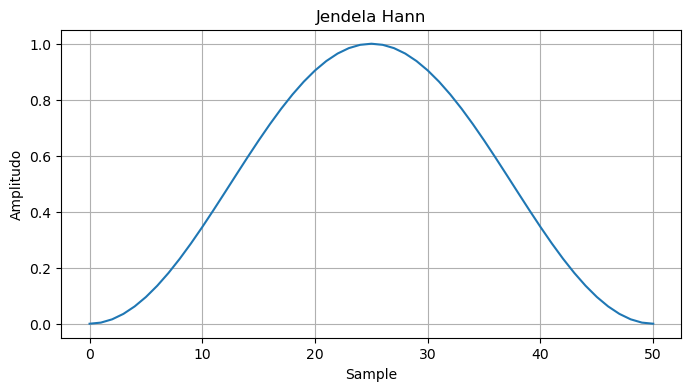

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Panjang jendela
window_length = 51  

# Membuat jendela Hann
hann_window = np.hanning(window_length)

# Plot jendela Hann
plt.figure(figsize=(8, 4))
plt.plot(hann_window)
plt.title('Jendela Hann')
plt.xlabel('Sample')
plt.ylabel('Amplitudo')
plt.grid(True)
plt.show()

Dalam contoh ini, kami menggunakan pustaka NumPy untuk membuat jendela Hann dengan panjang 51. Kami kemudian memplot jendela Hann tersebut untuk melihat bentuknya. Jendela Hann akan memiliki karakteristik yang menurun secara sinusoidal dari 0 hingga 1, dengan nilai tertinggi di tengah jendela dan nilai terendah di tepi jendela.

### Jendela Kaiser

Jendela Kaiser adalah salah satu jenis jendela yang digunakan dalam pemrosesan sinyal untuk mengurangi efek leakage dan memperbaiki resolusi frekuensi dalam analisis spektral. Dibandingkan dengan jendela lain seperti jendela Hamming atau Hann, jendela Kaiser memiliki karakteristik yang lebih dapat disesuaikan, yang memungkinkan pengguna untuk mengatur parameter beta. Parameter ini mengontrol bentuk jendela dan mempengaruhi tingkat penurunan sinyal di tepi jendela serta lebar puncak utamanya. Dengan memilih nilai beta yang sesuai, pengguna dapat menyesuaikan antara resolusi frekuensi yang lebih baik dan penurunan sinyal yang lebih kecil di tepi jendela. Keunggulan utama dari jendela Kaiser adalah fleksibilitasnya dalam menyesuaikan karakteristiknya dengan kebutuhan aplikasi tertentu. Jendela ini umumnya digunakan dalam berbagai aplikasi pemrosesan sinyal, termasuk dalam desain filter FIR dan IIR, spektrografi, dan analisis spektral lainnya di mana kontrol yang lebih besar terhadap lebar puncak dan penurunan sinyal di tepi jendela dibutuhkan untuk memperoleh hasil yang optimal.

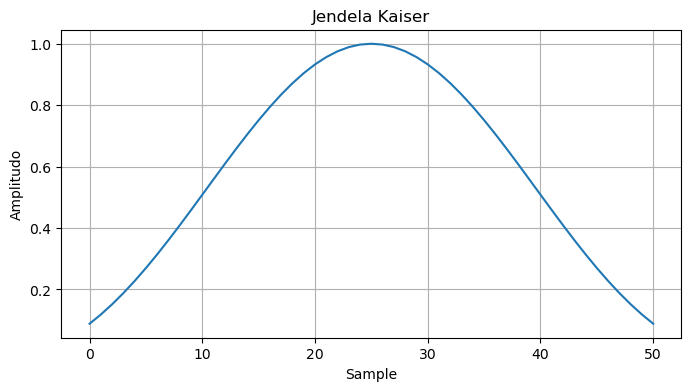

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Panjang jendela
window_length = 51  

# Parameter jendela Kaiser
alpha = 4.0

# Membuat jendela Kaiser
kaiser_window = np.kaiser(window_length, alpha)

# Plot jendela Kaiser
plt.figure(figsize=(8, 4))
plt.plot(kaiser_window)
plt.title('Jendela Kaiser')
plt.xlabel('Sample')
plt.ylabel('Amplitudo')
plt.grid(True)
plt.show()

Dalam contoh ini, kami menggunakan pustaka NumPy untuk membuat jendela Kaiser dengan panjang 51 dan parameter alpha sebesar 4.0. Kemudian, kami memplot jendela Kaiser tersebut untuk melihat bentuknya. Jendela Kaiser akan memiliki karakteristik yang berbentuk seperti jendela yang lebih halus dibandingkan dengan jendela-jendela lainnya, dan tingkat penurunan sinyal di tepi jendela dapat diatur dengan mengubah nilai parameter alpha. Semakin besar nilai alpha, semakin tajam penurunan sinyal di tepi jendela.